In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv')

# Data Cleaning

In [5]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [6]:
df.shape

(7098928, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7098928 entries, 0 to 7098927
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 325.0 MB


In [8]:
df['Date']= pd.to_datetime(df['Timestamp'], unit='s')

In [9]:
df.head()

,Timestamp,Open,High,Low,Close,Volume,Date
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00


In [10]:
df = df[~df['Date'].dt.year.isin([2012, 2013, 2014])]
# or df = df[(df['year'] >= 2015) & (df['year'] <= 2025)]

In [11]:
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
Date,,,,,,
2015-01-01 00:00:00,1.420070e+09,316.67,316.67,316.67,316.67,1.336312
2015-01-01 00:01:00,1.420070e+09,316.38,316.38,316.30,316.30,3.000000
2015-01-01 00:02:00,1.420071e+09,316.30,316.30,316.30,316.30,0.000000
2015-01-01 00:03:00,1.420071e+09,316.30,316.30,316.30,316.30,0.000000
2015-01-01 00:04:00,1.420071e+09,316.23,316.88,316.20,316.88,4.077000


In [13]:
df.loc['2020-11-15']

,Timestamp,Open,High,Low,Close,Volume
Date,,,,,,
2020-11-15 00:00:00,1.605398e+09,15916.88,15916.88,15901.71,15901.71,1.046218
2020-11-15 00:01:00,1.605398e+09,15906.77,15906.77,15895.00,15895.00,1.182469
2020-11-15 00:02:00,1.605399e+09,15900.36,15902.09,15893.84,15902.09,0.733027
2020-11-15 00:03:00,1.605399e+09,15900.09,15906.20,15900.09,15906.20,0.994389
2020-11-15 00:04:00,1.605399e+09,15900.00,15905.59,15898.38,15903.61,2.374064
...,...,...,...,...,...,...
2020-11-15 23:55:00,1.605484e+09,15917.97,15921.66,15917.97,15921.66,0.208800
2020-11-15 23:56:00,1.605485e+09,15912.50,15918.32,15909.98,15913.56,0.199135
2020-11-15 23:57:00,1.605485e+09,15917.78,15917.78,15917.78,15917.78,0.043529


In [14]:
df.columns = df.columns.str.lower()

# Data Exploration

In [15]:
# resampling to monthly/yearly/weekly frequency and calc the mean closing price
df.resample('M').mean() # or Y, W

,timestamp,open,high,low,close,volume
Date,,,,,,
2015-01-31,1.421410e+09,251.016341,251.210397,250.813418,251.017518,17.481049
2015-02-28,1.423958e+09,233.876887,233.974918,233.772456,233.884845,8.722941
2015-03-31,1.426507e+09,268.439819,268.517325,268.352370,268.440615,6.661841
2015-04-30,1.429142e+09,234.752875,234.810995,234.692616,234.751606,5.896171
2015-05-31,1.431778e+09,236.648834,236.701549,236.591383,236.644265,4.509684
...,...,...,...,...,...,...
2025-03-31,1.742129e+09,85044.141421,85071.599241,85016.624425,85044.007360,1.233456
2025-04-30,1.744762e+09,86333.273634,86355.798889,86308.529745,86331.166042,1.137700
2025-05-31,1.747397e+09,103376.919400,103396.772648,103356.319108,103376.595139,0.822993


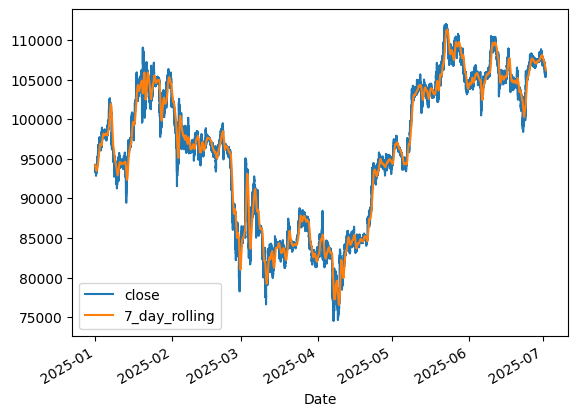

In [16]:
# 7-day rolling average (doing for 1000)
df['7_day_rolling'] = df['close'].rolling(window = 1000).mean()
df[['close', '7_day_rolling']].loc['2025'].plot()
plt.show()

In [17]:
# find out the highest average month
# resample -> Convenience method for frequency conversion and resampling of time series
df.resample('M').mean()['close'].idxmax()

Timestamp('2025-07-31 00:00:00')

In [18]:
# calculate daily returns -> (value of today / value of yesterday) -1
# pct_change -> Fractional change between the current and a prior element
df['daily_returns'] = df['close'].pct_change() * 100

In [19]:
# days with more than 10% change in closing price
df[abs(df['daily_returns']) > 10]
# 2 days where daily return was above 10% or less than -10%

,timestamp,open,high,low,close,volume,7_day_rolling,daily_returns
Date,,,,,,,,
2015-01-14 12:42:00,1.421239e+09,172.0,175.00,153.1,153.10,1000.442631,223.70562,-10.509703
2019-05-17 07:10:00,1.558077e+09,6250.0,6907.01,6178.0,6907.01,150.971151,7868.22483,10.512160


# Data visualization

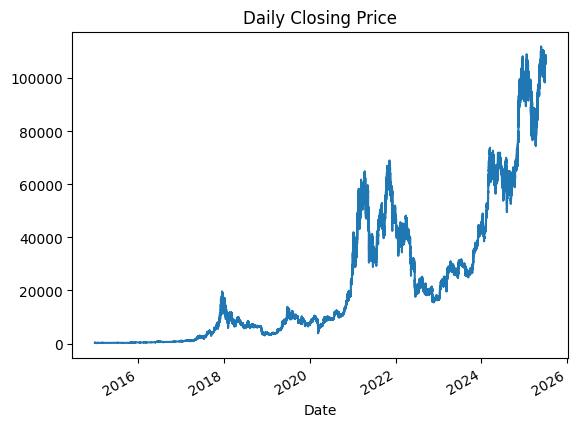

In [20]:
# daily closing price plot
df['close'].plot(title = 'Daily Closing Price')
plt.show()

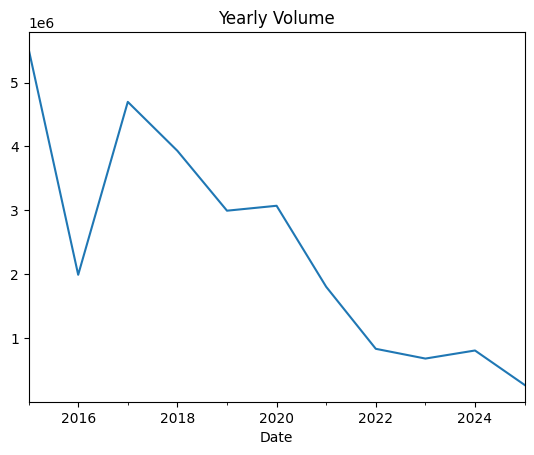

In [21]:
# plot the yearly volume
df.resample('Y').sum()['volume'].plot(title ='Yearly Volume')
plt.show()

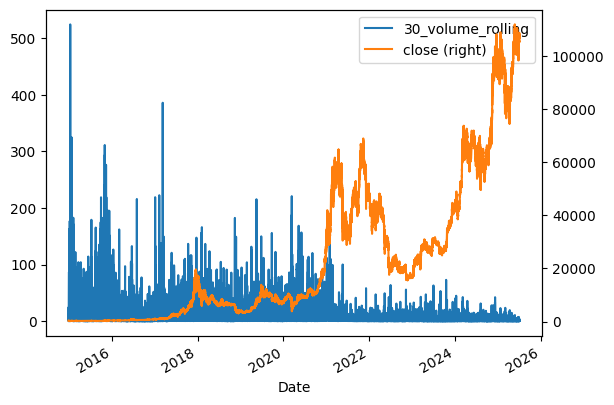

In [22]:
# plot closing price and 30-day rolling volume
df['30_volume_rolling'] = df['volume'].rolling(window = 30).mean() # 9000
df['30_volume_rolling'].plot(legend=True)
ax = df['close'].plot(secondary_y = True, legend = True)
plt.show()

In [23]:
# correlation between 30-day rolling volume and the closing price
df[['close', '30_volume_rolling']].corr()
# negative correlation -> means higher the volume lower the closing price and vice-versa

,close,30_volume_rolling
close,1.00000,-0.23932
30_volume_rolling,-0.23932,1.00000


# Data manipulation

In [24]:
df.isna().sum()

timestamp              0
open                   0
high                   0
low                    0
close                  0
volume                 0
7_day_rolling        999
daily_returns          1
30_volume_rolling     29
dtype: int64

In [25]:
df.head(2)

,timestamp,open,high,low,close,volume,7_day_rolling,daily_returns,30_volume_rolling
Date,,,,,,,,,
2015-01-01 00:00:00,1.420070e+09,316.67,316.67,316.67,316.67,1.336312,NaN,NaN,NaN
2015-01-01 00:01:00,1.420070e+09,316.38,316.38,316.30,316.30,3.000000,NaN,-0.116841,NaN


In [26]:
df['year'] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday # monday -0, sun - 6
df['is_weekend'] = df.index.weekday > 4 # sat, sun

df.head(1)

,timestamp,open,high,low,close,volume,7_day_rolling,daily_returns,30_volume_rolling,year,month,day,weekday,weekday_num,is_weekend
Date,,,,,,,,,,,,,,,
2015-01-01,1.420070e+09,316.67,316.67,316.67,316.67,1.336312,NaN,NaN,NaN,2015,1,1,Thursday,3,False
